# Decision Tree Visualization

This tutorial explains how to implement decision tree in regression. Decision tree can be visualized using "graphviz" and "dtreeviz". "Dtreeviz" is much better than "graphviz" as it generates beautiful visualization for decision boundaries. Decision tree is a nonparametric estimation and it splits feature space into regions. It is expected that better visualization of decision boundaries will give thorough understanding to beginners about the growth of decision tree. This tutorial is dedicated to decision tree regression. Both 3-D and 2-D plots are included to show the decision boundary in unvariate and multivariate data. It is pertinent to mention that sklearn uses CART. 

## Univariate Dataset 

Dataset contains only one column for independent variable i.e. "Unit".


#### Step 1: Import necessary libraries/packages 

In [3]:
#import necessary libraries/packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz # It is required to plot Decision Tree
import dtreeviz.trees as dt  # It is required to plot decision boundaries, 3-D plot, and other customized plot

#### Step 2: Load Data 

Let us consider a simple dataset. It has two columns. "Price" is the dependent variable and "Unit" is the independent variable. I created the dataset using the following linear relationsip:
$$ Price = 5.0*Unit + 10 $$
For sake of simplicity, I created only 10 data points.

In [4]:
df=pd.read_csv("simplereg.csv")
df

,Price,Unit
0,10,0
1,15,1
2,20,2
3,30,4
4,35,5
5,40,6
6,45,7
7,50,8
8,55,9
9,60,10


#### Step 3: Separate Independent and Dependent Variables 

In [5]:
col_names=["Unit"]
X=df[col_names]
X1 = X.values.reshape(-1,1)
y=df['Price'].astype(float)

#### Step 4: Create Model 

Instantiate DecisionTreeRegressor. Fit independent and dependent variable to the object of DecisionTreeRegressor. Predict the output. It is very simple and just three lines we need to code to use Decision Tree in Regression.


In [6]:
reg_line = DecisionTreeRegressor()
reg_line1 = reg_line.fit(X1,y)
reg_line_predict = reg_line1.predict(X1)

#### Step 5: Line Plot to Compare Actual and Predicted 

In [7]:
def plot_tree_pred():
    plt.scatter(X,y,color="red",alpha=0.4,label="Actual")
    plt.plot(X,reg_line_predict,color="blue",label="Predicted")
    plt.xlabel("Unit",fontweight="bold")
    plt.ylabel("Price",fontweight="bold")
    plt.legend()
    plt.title("Regression using Decision Tree")
    plt.show()

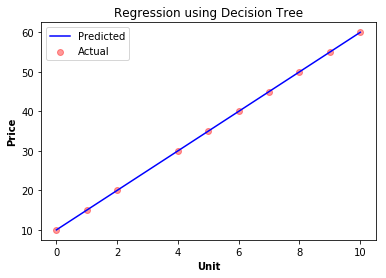

In [8]:
plot_tree_pred()

#### Step 6:Plot Decision Tree Using Graphviz 

Decision Tree creates a hierarchical structure. It is an inverted tree. We can plot entire decision tree using graphviz.Import graphviz from sklearn.tree.Install graphviz from the link menationed in [4]. If you are using win 32 bit system then graphviz will be installed at Program Files by default. If you are using 64 bit then graphviz will be installed at Program Files(x86) by default. In Python, we can use external command using subprocess. Alternatively we can import os or operating system and directly type the command as string. Let us consider a function plot_graphviz(). It will plot a figure. Figure size is 20x20. We need to call export_graphviz with the following arguments:
             1. model
             2. path of the "dot" file. Graphviz will create this "dot" file as output.
             3. Feature Names or Column Names
Find the location of bin folder in Graphviz. You can easily find Graphviz in Program Files or in Program Files(x86) as per your Win system. Concatinate its path to environment. Please refer the code:
             $$os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'$$
             $$os.system('dot -Tpng dtree_example.dot -o dtree_example.png')$$

First line, as stated above, concatenates the path of graphviz to environment. In the second line you need to pass the command to operating system to create a dtree_example.png from the dtree_example.dot file. dtree_example.dot was already created by export_graphviz. If you are using this Jupyter then this .ipynb file will create above two output files at C:/Users/User location by default. You can read the image and display it. Please refer the last two lines as mentioned below:
                       $$plt.imshow(img.imread("dtree\_example.png"))$$
    $$plt.show()$$

In [9]:
def plot_graphviz():
    plt.figure(figsize=(20,20))
    export_graphviz(reg_line1,out_file="dtree_example.dot",feature_names=col_names)
    #from subprocess import call
    #call(["dot", "-Tpng", "dtree.dot", "-o","dtree.png","-Gdpi=600"])
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
    os.system('dot -Tpng dtree_example.dot -o dtree_example.png')
    import matplotlib.image as img
    plt.imshow(img.imread("dtree_example.png"))
    plt.show()

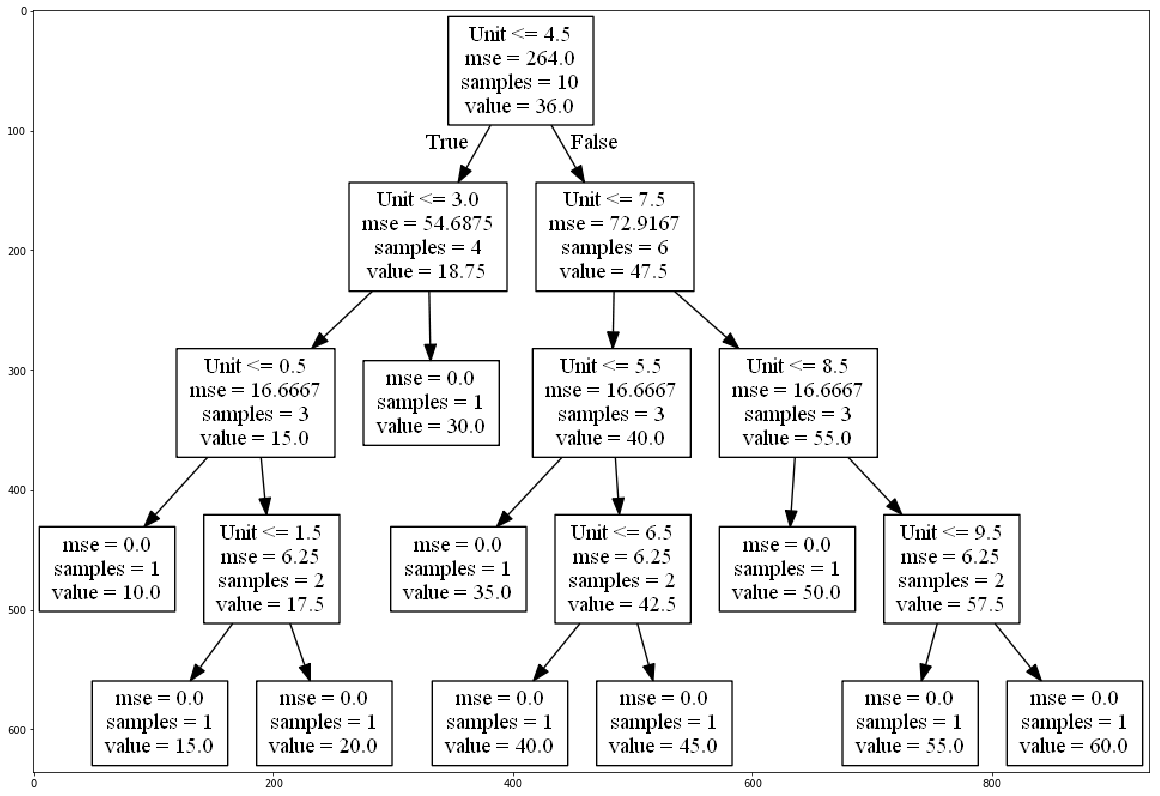

In [10]:
plot_graphviz()

#### Step 7: Plot Decision Tree Using Dtreeviz 

Install dtreeviz using the following command at Anaconda Prompt:
$$ pip \space install \space dtreeviz $$

During installation dtreeviz will download necessary dependencies. dtreeviz has certain advantages and quite different from graphviz.You can use either graphviz or dtreeviz. dtreeviz creates .svg file not .png like graphviz. You can use your browser to view .svg file just like an .html file. dtreeviz shows the generation of decision boundaries from root node to leaf node. You can visulaize the split of each node. In my opinion it is exceptional. If you call plot_dtreeviz() a browser will open separately and show the entire tree. let us consider the code to implement dtreeviz. Call dtreeviz with the following arguments:
$$ 1.\space tree \_ model \space i.e. \space reg \_ line$$
$$ 2.\space x \_ data \space i.e. \space X1$$
$$ 3.\space y \_ data \space i.e. \space  y$$
$$ 4.\space target \_ name \space i.e. \space "Price"$$
$$ 5.\space feature \_ names \space i.e. \space "Unit"$$

In [11]:
def plot_dtreeviz():
    viz = dt.dtreeviz(reg_line,
               X1,
               y,
               target_name='Price',
               feature_names="Unit")
    viz.save("dtreeviz_example.svg")
    viz.view()

In [12]:
plot_dtreeviz()

#### Step 8: Plot Decision Boundaries Using Dtreeviz 

It is one of the most excellent features of dtreeviz. Decision Tree creates decision boundaries to separate data points during the creation and growth of tree. dtreeviz will draw dotted vartical lines to separate data points for univariate dataset. It looks like simple 2-D plot. dtreeviz will draw 3-D and 2-D plot to show decision boundaries for bivariate dataset. Please refer application of dtreeviz for bivariate dataset.

In [13]:
def plot_decision_boundary():
    fig = plt.figure()
    ax = fig.gca()
    dt.rtreeviz_univar(ax=ax,tree_model=reg_line,
                    x_data=X1, 
                    y_data=y,
                    feature_names='Unit',
                    target_name='Price',
                    fontsize=12)
    plt.show()

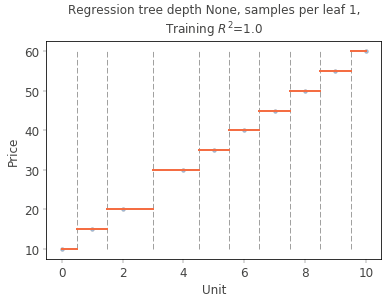

In [14]:
plot_decision_boundary()

The above plot shows decision tree boundaries.

## Multivariate Dataset

Let us consider Longley.csv dataset for the above purpose. For sake of simplicity, I will consider only two variables - "GNP" 
and "Unemployed". Our objective is to find a suitable expression for the following expression:
    $$ Employed \space = \space function(Unemployed \space , \space GNP) $$
    where Employed is dependent variable. Unemployed and GNP are independent variables.
$$\space$$
It is pertinent to mention that above all steps will remain same for bivariate regression analysis.    

In [15]:
df = pd.read_csv("longley.csv")
df.head()

,Unnamed: 0,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
0,1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1,1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
2,1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
3,1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
4,1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [16]:
col_names = ["GNP","Unemployed"]
X_bi = df[col_names]
X1_bi = np.asarray(X_bi)
Y = df["Employed"].astype(float)

In [17]:
reg_line_bi = DecisionTreeRegressor()
reg_line_bi = reg_line_bi.fit(X1_bi,Y)

reg_line_predict_bi = reg_line_bi.predict(X1_bi)

In [18]:
def plot_graphvizs(reg_line,x:int,col_names,model):
    import matplotlib.image as img
    plt.figure(figsize=(20,20))
    fname = "dtree_"+str(x)+".dot"
    export_graphviz(model,out_file=fname,feature_names=col_names)
    #from subprocess import call
    #call(["dot", "-Tpng", "dtree.dot", "-o","dtree.png","-Gdpi=600"])
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
    fnames="dtree"+str(x)+".png"
    os.system(f"dot -Tpng {fname} -o {fnames}")
    plt.imshow(img.imread(fnames))
    plt.show()

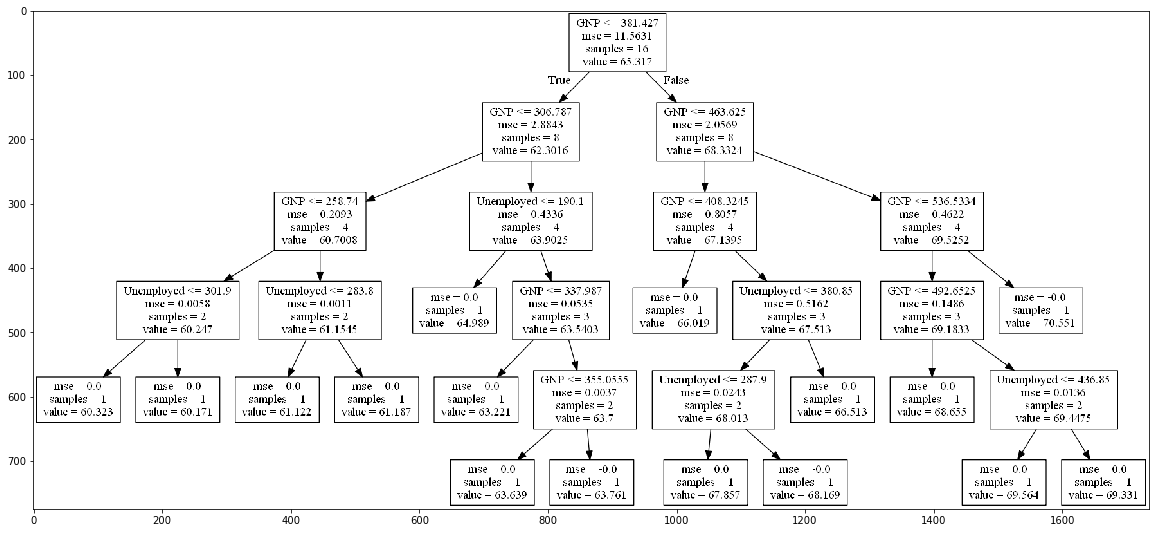

In [19]:
plot_graphvizs(reg_line_bi,1,col_names,reg_line_bi)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
def plot_dtreeviz_3d(col_names,X,y,model):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')
    dt.rtreeviz_bivar_3D(ax=ax,
                      tree_model=model,   
                      x_data=X, 
                      y_data=y,
                      feature_names=col_names,
                      target_name='Employed',
                      fontsize=12,
                      elev=20,
                      azim=45,
                      dist=10.2,
                      show={'splits','title'})
    plt.show()    

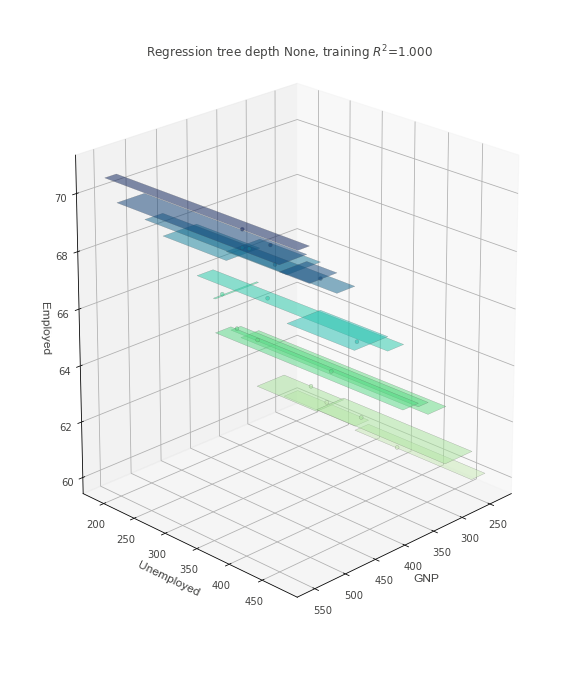

In [22]:
plot_dtreeviz_3d(col_names,X1_bi,Y,reg_line_bi)

In [23]:
def plot_decision_boundary(col_names,X,y,model):
    fig, ax = plt.subplots(1, 1, figsize=(10,6))
    dt.rtreeviz_bivar_heatmap(ax=ax,
                              tree_model=model,
                              x_data = X, 
                              y_data=y,
                              feature_names=col_names,
                              fontsize=14)
    
    plt.show()    

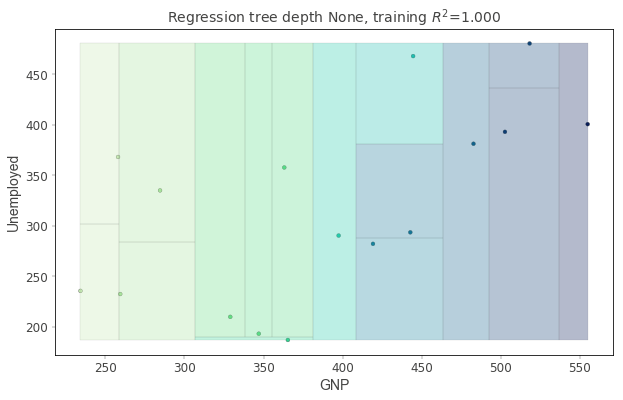

In [24]:
plot_decision_boundary(col_names,X1_bi,Y,reg_line_bi)

#### References: 

1. A visual introduction to machine learning
   http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
   
2. Decision Tree Visualization
   https://github.com/parrt/dtreeviz
    
3. Decision Tree Visualization
   https://explained.ai/decision-tree-viz/
   
   

#### Note: Please refer lecture notes  